## Experiment: Vary Frequency
First, we test the model to see where it 'breaks' cluster accuracy if frequency is varying within a cluster

## Setup

First, we set up our notebook by downloading the appropriate packages

### Dependencies

In [1]:
pip install matplotlib scipy pandas numpy networkx seaborn scikit-learn

  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/49/21/3723de321531c9745e40f1badafd821e029d346155b6c79704e0b7197552/scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd

### Imports

In [2]:
# base libraries
import importlib
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import os

import networkx as nx

import time

from IPython.utils.io import capture_output # supress outputs

from sklearn.metrics.cluster import adjusted_rand_score

### Fix pathway

In [3]:
# fix directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)

print("Current working directory:", os.getcwd())

from trcrpm.src import Hierarchical_TRCRP_Mixture, TRCRP_Mixture

Current working directory: /hdsi-collab-persistent/cephfs/Setup


### Helper Functions

1. **`run_model(data, num_chains = 8, p = 5, MCMC_steps=1000, hyperparam_steps=50, runtime = True)`**
    - **Returns**: Fitted model
        - The dataframe index needs to be reset as an integer.
        - Choose a high number for `MCMC_steps` to allow for a burn-in period.
        - `p` is our lag window

2. **`post_dep(model, num_samples)`**
    - **Returns**: Pairwise posterior dependence matrices (cluster probabilities)
        - The array is of size `NUM_SAMPLES x NUM_CHAINS x LEN(DF) x LEN(DF)`

3. **`clustering(post_probs, threshold = 0.75)`**
    - **Returns**: Clusters
        - If time series `i` and `k` are dependent in `threshold%` of samples, they are clustered together.
        - Averages over `NUM_SAMPLES` and `NUM_CHAINS`.

4. **`return_ari(true_labels, predicted_clusters)`**
    - **Returns**: Adjusted Rand Index (ARI) if ground truth is available


In [4]:
import importlib

In [5]:
import experiments.helper_functions as helpers
importlib.reload(helpers)

<module 'experiments.helper_functions' from '/hdsi-collab-persistent/cephfs/Setup/experiments/helper_functions.py'>

## Results

In [6]:
import experiments.data_generation as data_gen
import experiments.helper_functions as helpers
import experiments.plotting_functions as plotter

In [7]:
importlib.reload(plotter)

<module 'experiments.plotting_functions' from '/hdsi-collab-persistent/cephfs/Setup/experiments/plotting_functions.py'>

### Experiment 1: freq = 0

(100, 50)


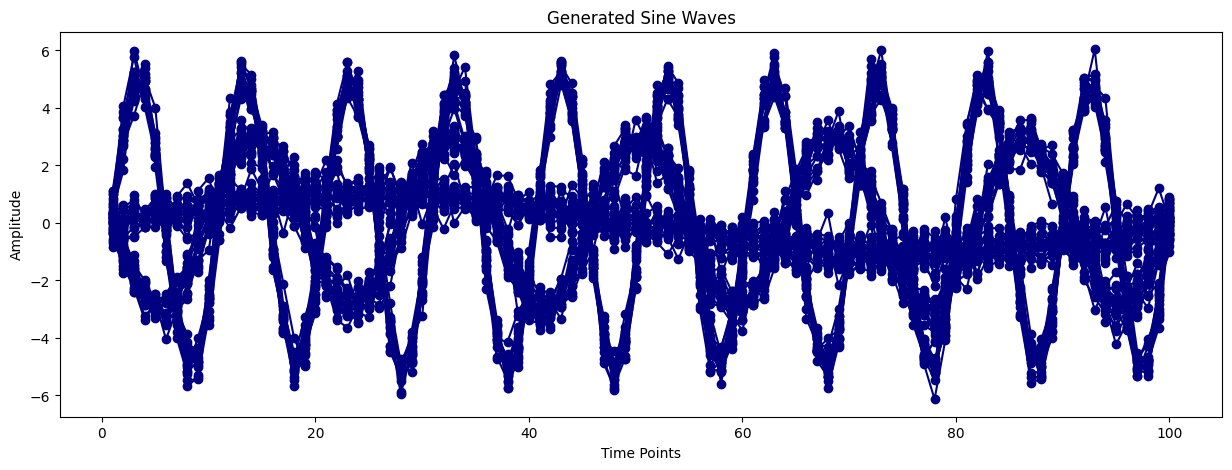

In [8]:
i = 0
df = data_gen.generate_sine_wave_data(frequency_noise=i, num_clusters = 3, random_state=42, use_colors = False)

data = df.iloc[1:]
labels = df.iloc[0].values

print(data.shape) # NUM_OBSERVATIONS X NUM_TIMESEREIES

In [9]:
unique_labels = np.unique(labels)
true_clusters = [set(int(item) for item in np.where(labels == label)[0]) for label in unique_labels]
print(true_clusters)

[{0, 33, 3, 36, 6, 39, 9, 42, 12, 45, 15, 48, 18, 21, 24, 27, 30}, {1, 34, 4, 37, 7, 40, 10, 43, 13, 46, 16, 49, 19, 22, 25, 28, 31}, {32, 2, 35, 5, 38, 8, 41, 11, 44, 14, 47, 17, 20, 23, 26, 29}]


In [10]:
# # true clusters
# unique_labels = np.unique(labels)
# true_clusters = [set(np.where(labels == label)[0]) for label in unique_labels]
# true_clusters

In [11]:
# fit the model
model1 = helpers.run_model(data)

# obtain clusters
dep_matrices = helpers.post_dep(model1, 20)
predicted_clusters1 = helpers.clustering(dep_matrices, threshold = 0.75)

# ari
helpers.return_ari(labels, predicted_clusters1)

# printer clusters
predicted_clusters1

MCMC inference time: 7 minutes and 50 seconds
Hyperparameter optimization time: 3 minutes and 48 seconds
Sampling Time: 2 minutes and 17 seconds


[{0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48},
 {1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49},
 {2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47}]

### Experiment 2: freq = 0.1



In [ ]:
i = 0.1
df = data_gen.generate_sine_wave_data(frequency_noise=i, num_clusters = 3, random_state=42, use_colors = False)

data = df.iloc[1:]
labels = df.iloc[0].values

print(data.shape) # NUM_OBSERVATIONS X NUM_TIMESEREIES

# fit the model
model2 = helpers.run_model(data)

# obtain clusters
dep_matrices = helpers.post_dep(model2, 20)
predicted_clusters2 = helpers.clustering(dep_matrices, threshold = 0.75)

# ari
print(helpers.return_ari(labels, predicted_clusters2))

# printer clusters
predicted_clusters2

(100, 50)


### Experiment 3: freq = 0.2

In [ ]:
i = 0.2
df = data_gen.generate_sine_wave_data(frequency_noise=i, num_clusters = 3, random_state=42, use_colors = False)

data = df.iloc[1:]
labels = df.iloc[0].values

print(data.shape) # NUM_OBSERVATIONS X NUM_TIMESEREIES

# fit the model
model3 = helpers.run_model(data)

# obtain clusters
dep_matrices = helpers.post_dep(model3, 20)
predicted_clusters3 = helpers.clustering(dep_matrices, threshold = 0.75)

# ari
print(helpers.return_ari(labels, predicted_clusters3))

# printer clusters
predicted_clusters3

### Experiment 4: freq = 0.3

In [ ]:
i = 0.3
df = data_gen.generate_sine_wave_data(frequency_noise=i, num_clusters = 3, random_state=42, use_colors = False)

data = df.iloc[1:]
labels = df.iloc[0].values

print(data.shape) # NUM_OBSERVATIONS X NUM_TIMESEREIES

# fit the model
model4 = helpers.run_model(data)

# obtain clusters
dep_matrices = helpers.post_dep(model4, 20)
predicted_clusters4 = helpers.clustering(dep_matrices, threshold = 0.75)

# ari
helpers.return_ari(labels, predicted_clusters4)

# printer clusters
predicted_clusters4

### 
The algorithm broke! Let's look at the latent structure in the clusters to observe more

In [ ]:
true_clusters

In [ ]:
# obtain clusters
#dep_matrices = helpers.post_dep(model4, 20)
predicted_clusters4 = helpers.clustering(dep_matrices, threshold = 0.76)

# ari
helpers.return_ari(labels, predicted_clusters4)

# printer clusters
predicted_clusters4

In [ ]:
plotter.compare_clusters(model4.dataset, labels, [0], [0, 9, 18, 30, 36, 39], [3, 6, 12, 15, 21, 24, 27, 33, 42, 48])

Note that the algorithm decides to split up cluster 0 into 2 clusters: one cluster has one obvious peak and the other has 2. 

In [ ]:
plotter.compare_clusters(model4.dataset, labels, [1], [1, 7, 13, 16, 25, 34], [4, 10, 19, 22, 28, 31, 37, 40, 43, 46, 49])

Similar to the first cluster, the algorithm splits up the cluster when the within-cluster bhevaior starts to vary too much

In [ ]:
plotter.compare_clusters(model4.dataset, labels, [2], [2, 8, 11, 17, 23, 26, 29, 32, 35, 38, 41, 44, 47], [5, 14, 20])